In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df  = pd.read_csv('FuelConsumptionCo2.csv')
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
300,2014,DODGE,CHALLENGER SRT,MID-SIZE,6.4,8,M6,Z,16.8,10.4,13.9,20,320
1039,2014,VOLKSWAGEN,JETTA GLI,COMPACT,2.0,4,M6,Z,10.6,7.4,9.2,31,212
623,2014,KIA,SORENTO 4WD,SUV - SMALL,2.4,4,A6,X,12.3,9.3,11.0,26,253
972,2014,TOYOTA,COROLLA,MID-SIZE,1.8,4,A4,X,8.6,6.5,7.7,37,177
375,2014,FORD,F150 FFV,PICKUP TRUCK - STANDARD,3.7,6,A6,X,14.0,10.3,12.3,23,283


In [4]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
381,5.0,8,14.6,336
252,1.4,4,7.5,172
177,6.2,8,16.6,382
871,3.8,6,10.8,248
197,1.4,4,7.8,179


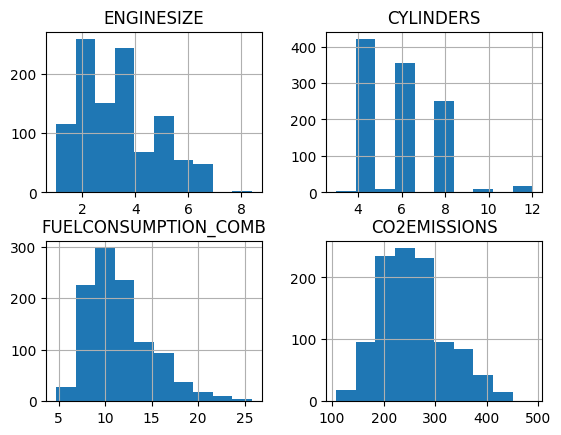

In [7]:
cdf.hist()
plt.show()

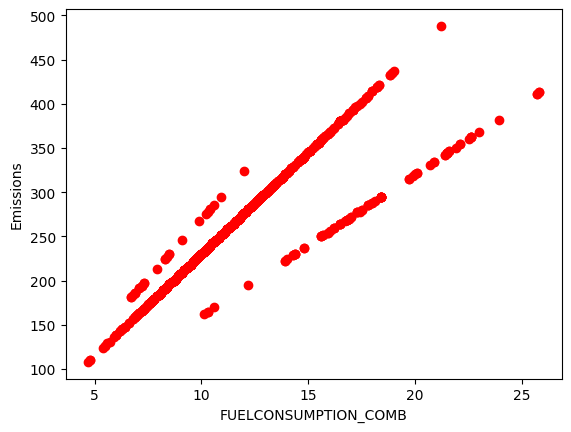

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='red')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emissions')
plt.show()

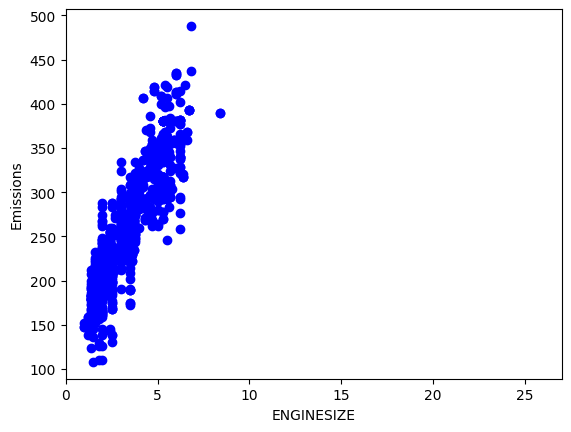

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emissions')
plt.xlim(0, 27)
plt.show()

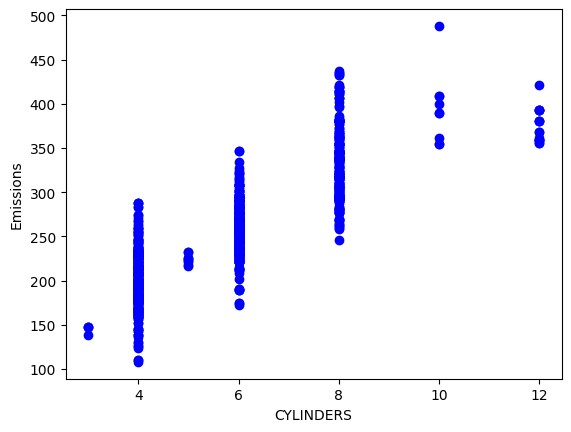

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('Emissions')
plt.show()

In [11]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train.reshape(-1, 1), y_train)

print('Coefficient: ', lr.coef_[0])
print('Intercept: ', lr.intercept_)

Coefficient:  38.992978724434074
Intercept:  126.28970217408721


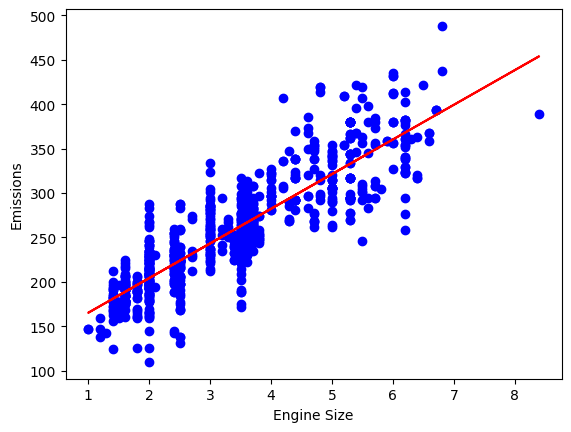

In [15]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, lr.coef_ * X_train + lr.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test.reshape(-1, 1))

print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 Score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 24.10
Mean Squared Error: 985.94
Root Mean Squared Error: 31.40
R^2 Score: 0.76


Text(0, 0.5, 'Emissions')

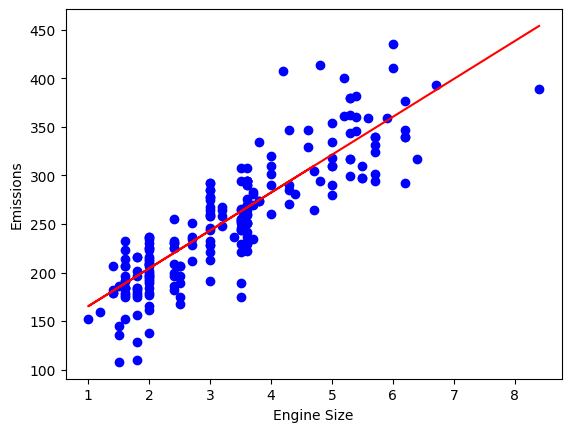

In [17]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, lr.coef_ * X_test + lr.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

In [18]:
x = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [19]:
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
lre = LinearRegression()

lre.fit(x_train.reshape(-1, 1), Y_train)

print('Coefficient: ', lre.coef_[0])
print('Intercept: ', lre.intercept_)

Coefficient:  16.18090078119919
Intercept:  69.10302617988452


In [21]:
yhat = lre.predict(x_test.reshape(-1, 1))

print('MAE: %.2f' % mean_absolute_error(Y_test, yhat))
print('MSE: %.2f' % mean_squared_error(Y_test, yhat))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_test, yhat)))
print('R^2: %.2f' % r2_score(Y_test, yhat))

MAE: 20.44
MSE: 797.43
RMSE: 28.24
R^2: 0.81


In [22]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


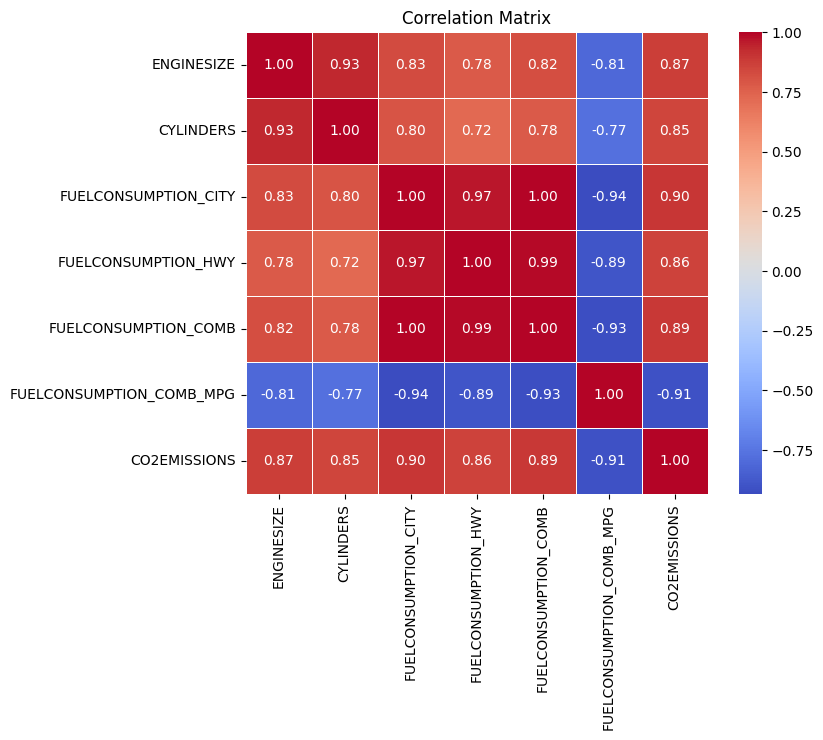

In [24]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [25]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


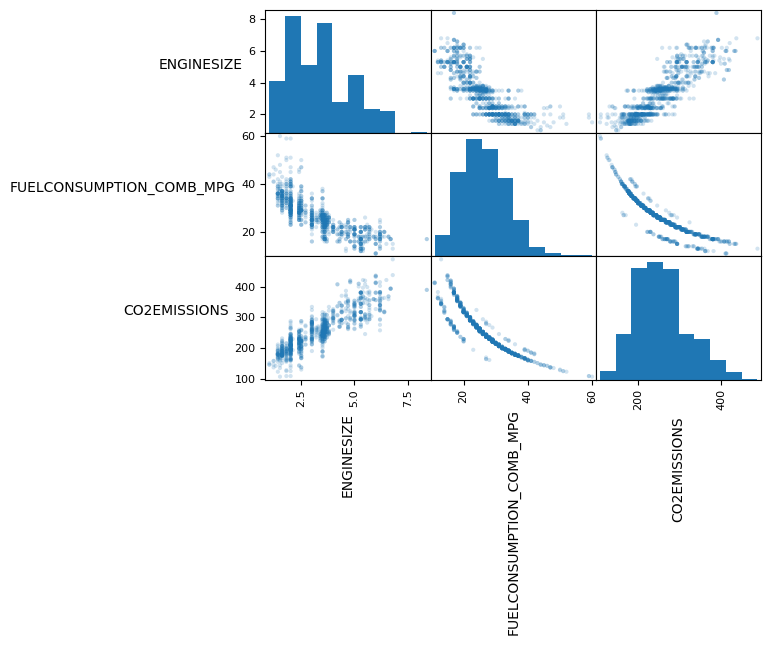

<Figure size 1200x1000 with 0 Axes>

In [27]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

plt.figure(figsize=(12, 10))

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [28]:
X = df.iloc[:, [0, 1]].to_numpy()
y = df.iloc[:, [2]].to_numpy()

In [29]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
x_scale = s_sc.fit_transform(X)

In [30]:
pd.DataFrame(x_scale).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

In [37]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print('Coefficients: ', lm.coef_)
print('Intercept: ', lm.intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [36]:
means_ = s_sc.mean_
std_devs_ = np.sqrt(s_sc.var_)

coef_original = lm.coef_ / std_devs_
intercept_original = lm.intercept_ - np.sum((means_ * lm.coef_) / std_devs_)

print('Coefficients: ', coef_original)
print('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


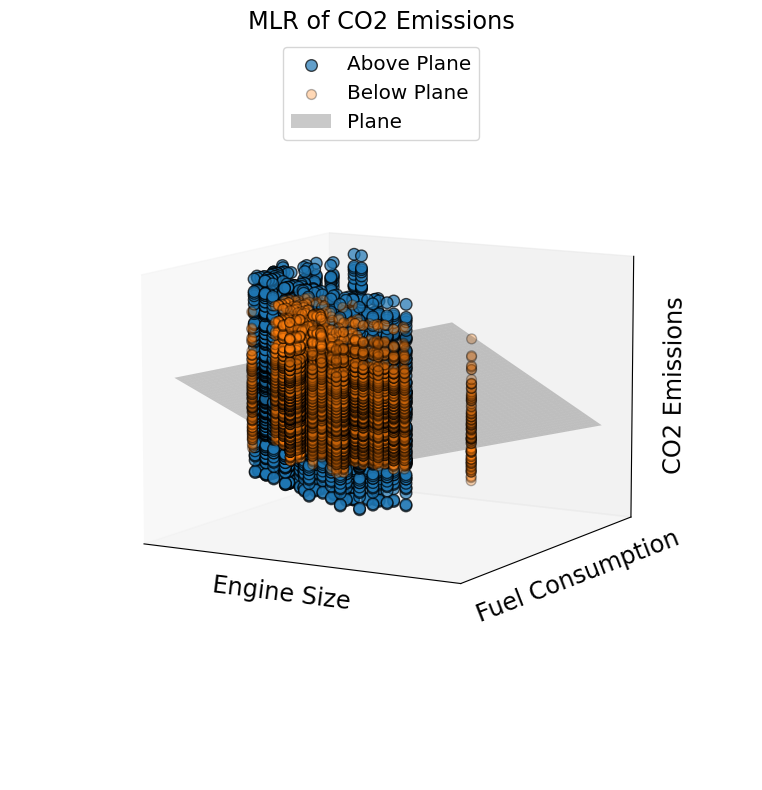

In [38]:
x1 = x_test[:, 0] if x_test.ndim > 1 else x_test
x2 = x_test[:, 1] if x_test.ndim > 1 else np.zeros_like(x1)

x1_surf, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100),
                               np.linspace(x2.min(), x2.max(), 100))

y_surf = lm.intercept_ + lm.coef_[0, 0] * x1_surf + lm.coef_[0, 1] * x2_surf

y_pred = lm.predict(x_test.reshape(-1, 1)) if x_test.ndim == 1 else lm.predict(x_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:, 0]
below_plane = below_plane[:, 0]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1[above_plane], x2[above_plane], y_test[above_plane], label='Above Plane', s=70, alpha=.7, ec='k')
ax.scatter(x1[below_plane], x2[below_plane], y_test[below_plane], label='Below Plane', s=50, alpha=.3, ec='k')

ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21, label='Plane')

ax.view_init(elev=10)

ax.legend(fontsize='x-large', loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('Engine Size', fontsize='xx-large')
ax.set_ylabel('Fuel Consumption', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('MLR of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

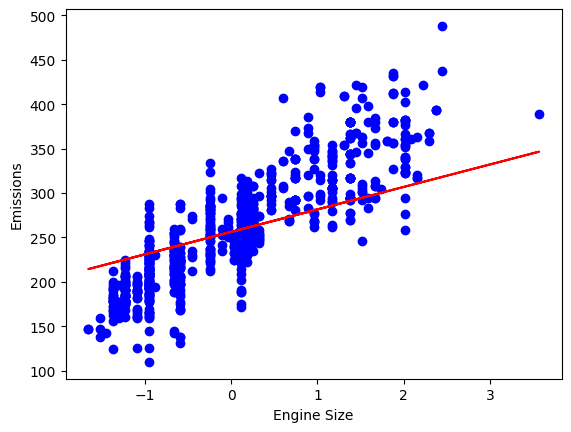

In [39]:
plt.scatter(x_train[:, 0], y_train, color='blue')
plt.plot(x_train[:, 0], lm.coef_[0, 0] * x_train[:, 0] + lm.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

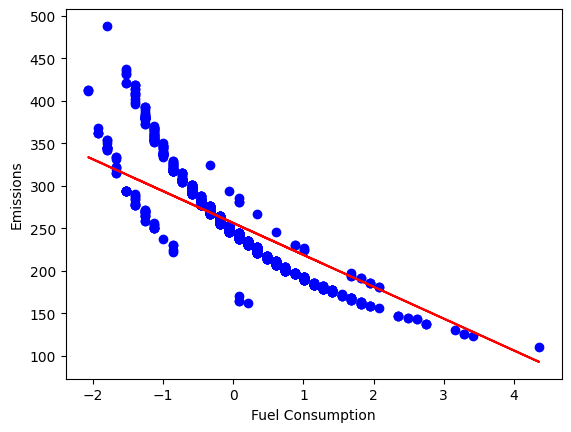

In [40]:
plt.scatter(x_train[:, 1], y_train, color='blue')
plt.plot(x_train[:, 1], lm.coef_[0, 1] * x_train[:, 1] + lm.intercept_[0], '-r')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.show()

In [42]:
x_train_1 = x_train[:, 0]
lr1 = LinearRegression()
lr1.fit(x_train_1.reshape(-1, 1), y_train)

coef_1 = lr1.coef_
intercept_1 = lr1.intercept_

print('Coefficient: ', coef_1)
print('Intercept: ', intercept_1)

Coefficient:  [[55.18408797]]
Intercept:  [256.77183014]


Text(0, 0.5, 'Emissions')

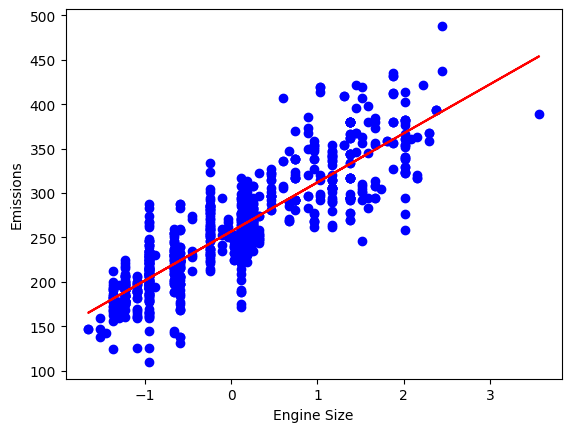

In [43]:
plt.scatter(x_train_1, y_train, color='blue')
plt.plot(x_train_1, coef_1[0] * x_train_1 + intercept_1, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

Text(0, 0.5, 'Emissions')

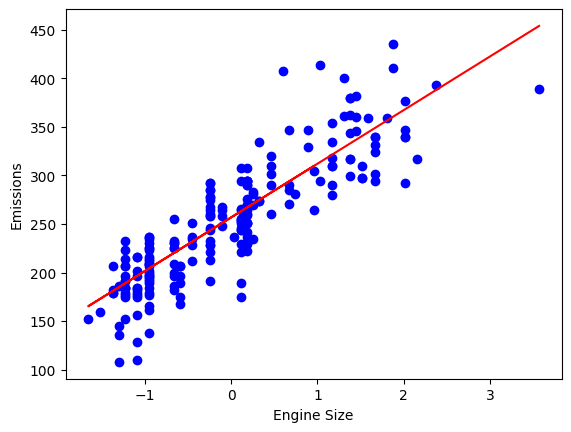

In [44]:
x_test_1 = x_test[:, 0]

plt.scatter(x_test_1, y_test, color='blue')
plt.plot(x_test_1, coef_1[0] * x_test_1 + intercept_1, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

In [45]:
x_train_2 = x_train[:, 1]
x_test_2 = x_test[:, 1]

lr2 = LinearRegression()
lr2.fit(x_train_2.reshape(-1, 1), y_train)

coef_2 = lr2.coef_
intercept_2 = lr2.intercept_

print('Coefficient: ', coef_2)
print('Intercept: ', intercept_2)

Coefficient:  [[-58.51827989]]
Intercept:  [256.09392179]


Text(0, 0.5, 'Emissions')

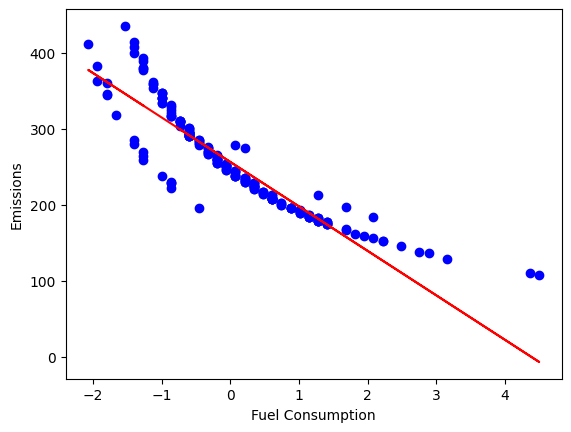

In [46]:
plt.scatter(x_test_2, y_test, color='blue')
plt.plot(x_test_2, coef_2[0] * x_test_2 + intercept_2, '-r')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')